# EXPLORATORY DATA ANALYSIS ON SALARIES 

This project analyses bank salary information of people with of different educational backgrounds, gender, minority backgrounds and job categories. It tend to explain how the various columns relate to each other.  

## PROCESS

My appraoch will include Data exploration, Data cleaning, Model building, and  Presenting results respectively.


## Data Exploration

I will start preparing the data by importing needed libraries and loading the data

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import statsmodels.api as sms
import statsmodels.api as sm
import statsmodels.formula.api as smf
from string import ascii_letters


%matplotlib inline

In [42]:
salary = pd.read_csv("/Users/raymondboateng/neuefische/EDA/data/us_bank_wages.csv") 
del salary['Unnamed: 0']
salary.head(10)

,SALARY,EDUC,SALBEGIN,GENDER,MINORITY,JOBCAT
0,57000,15,27000,1,0,3
1,40200,16,18750,1,0,1
2,21450,12,12000,0,0,1
3,21900,8,13200,0,0,1
4,45000,15,21000,1,0,1
5,32100,15,13500,1,0,1
6,36000,15,18750,1,0,1
7,21900,12,9750,0,0,1
8,27900,15,12750,0,0,1
9,24000,12,13500,0,0,1


In [120]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474 entries, 0 to 473
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   SALARY    474 non-null    int64
 1   EDUC      474 non-null    int64
 2   SALBEGIN  474 non-null    int64
 3   GENDER    474 non-null    int64
 4   MINORITY  474 non-null    int64
 5   JOBCAT    474 non-null    int64
dtypes: int64(6)
memory usage: 22.3 KB


We will study the the distribution of the salary and an independent variable

In [130]:
print(salary['SALARY'].describe())
#print(salary['SALBEGIN'].describe())

count       474.000000
mean      34419.567511
std       17075.661465
min       15750.000000
25%       24000.000000
50%       28875.000000
75%       36937.500000
max      135000.000000
Name: SALARY, dtype: float64


/Users/raymondboateng/.pyenv/versions/3.8.5/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


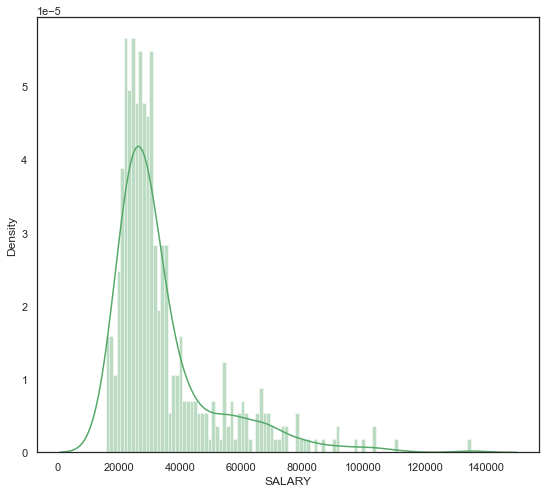

In [131]:
# A view of the salary distribution
plt.figure(figsize=(9, 8))
sns.distplot(salary['SALARY'], color='g', bins=100, hist_kws={'alpha': 0.4});

The salary distribution is skewed towards right with outliers above ~ 80000. It can be normalised using the log function. 




## Analyses of the Numerical data distribution

The initial analyses proves that the given is rife for further
anaylses.

Since all the data are numerical forms, we could plot them and look at the distribution

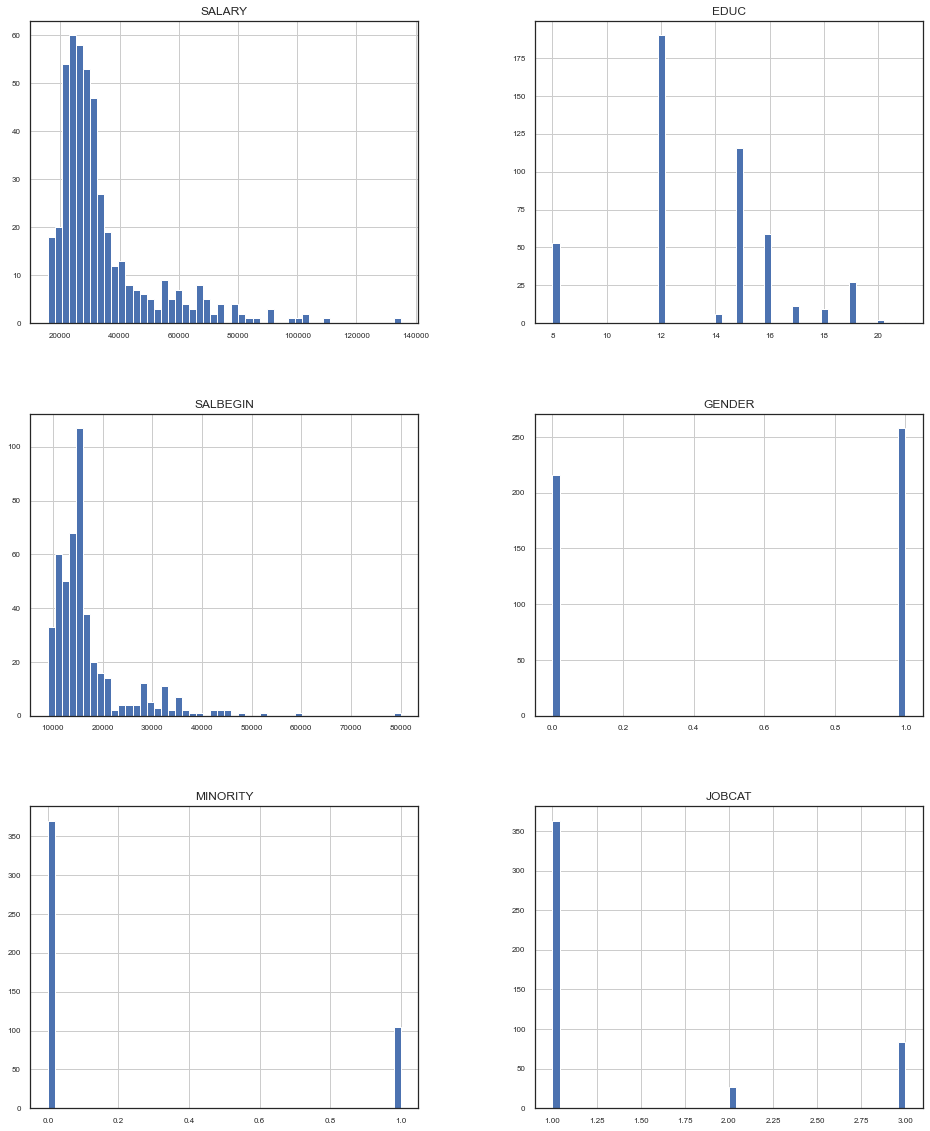

In [133]:
salary.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); # ; avoid having the matplotlib verbose informations

Salary and SALBEGIN have similar features, whiles minority and gender seem similar. We could analyse further by looking for correlations 

Based on the initial analyses, to adequately advise the stakeholder, I propose the following hypothesis

## Hypothesis:

1. Educated population will earn more beginner´s salary and high annual salary 

2. Strong correlation between  salary and Job categories
3. Majority of people should cluster around the median salary 

## Hypothesis 1

Test Hypothesis 1 by plotting to view relationship between education level and annual salary

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


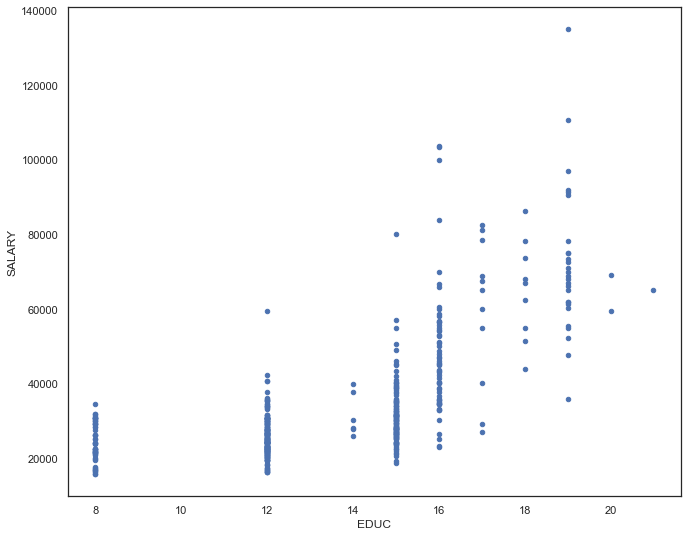

In [161]:
"salary.plot(x='EDUC', y='SALARY', kind='hexbin', gridsize=15, figsize=(11, 9) );"

salary.plot(x='EDUC', 
          y='SALARY', 
          kind='scatter',figsize=(11, 9) );

#reviews[reviews['price'] < 100].plot.hexbin(x='price', y='points', gridsize=15)

Regression Analyses is carried on the relation between Education and Salary

In [136]:
def get_line_equation(p1, p2):
    """
    Solve the system of equations:
    y1 = m*x1 + b
    y2 = m*x2 + b
    
    This translates to:
    m = (y2 - y1) / (x2 - x1)
    b = y1 - m*x1
    
    Input:
    p1: first point [x1, y1]
    p2: second point [x2, y2]
    
    returns: slope, intercept
    """
    m = (p2[1] - p1[1]) / (p2[0] - p1[0]) # Slope
    b = p1[1] - m * p1[0] # Intercept
    return  m, b

In [11]:
# Calculate the intercept and slope of a line between two points
Line1 = [salary.SALARY[1],salary.EDUC[1]]
Line2 = [salary.SALARY[2],salary.EDUC[2]]
slope, intercept = get_line_equation(p1=Line1, p2=Line2) 
print('intercept: ', intercept)
print('slope: ', slope)

intercept:  7.4239999999999995
slope:  0.00021333333333333333


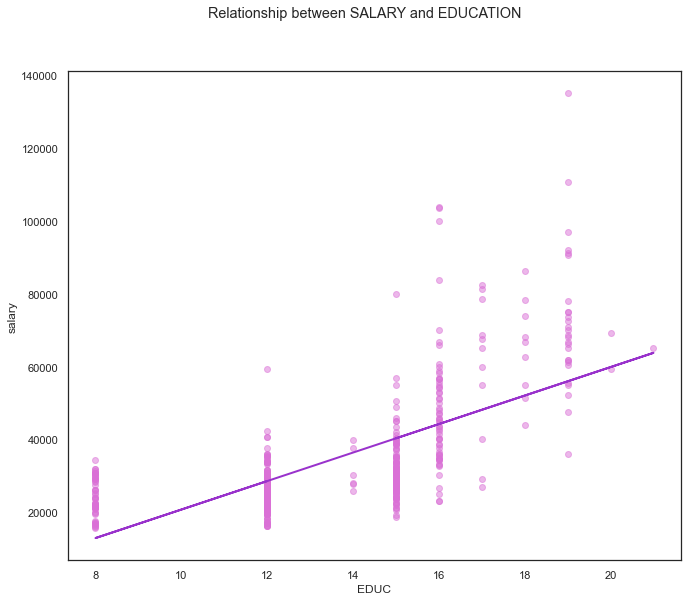

In [151]:
"# Plot line fitted on all of the pointsfig = salary.plot(x='EDUC', y='SALARY', kind='scatter', figsize=(11, 9) # plot the linear regression lineplt.plot(np.unique(salary.EDUC), np.poly1d(np.polyfit(salary.EDUC, salary.SALARY, 1))(np.unique(salary.EDUC)));# plot the line between two points#plt.plot([car1[0], car2[0]], [car1[1], car2[1]], color='red', linewidth=4)plt.title('Linear Regression Line');"


# Plotting the results of our model
fig, ax = plt.subplots(figsize=(11, 9))
x = salary.EDUC
# add data points
ax.scatter(x, y, alpha=0.5, color='orchid')
fig.suptitle('Relationship between SALARY and EDUCATION')
# plotting regression line
ax.plot(x, x*slope +intercept, '-', color='darkorchid', linewidth=2);
ax.set_ylabel("salary");
ax.set_xlabel("EDUC");

The line shows correlation between annual salary and education. 
The strength of the correlation is tested as follows:

In [139]:
# Prepare data for modeling
# Choose the predictor and add a constant term
X = salary[['EDUC']]
y = salary.SALARY
# Our model needs an intercept so we add a column of 1s:
X = sms.add_constant(X)
display(X.head())
display(y.head())

,const,EDUC
0,1.0,15
1,1.0,16
2,1.0,12
3,1.0,8
4,1.0,15


0    57000
1    40200
2    21450
3    21900
4    45000
Name: SALARY, dtype: int64

In [138]:
# Create an OLS model
model = sms.OLS(y, X)
# use the data to calculate the intercept and slope
results = model.fit()
# return the output of the model
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 SALARY   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.435
Method:                 Least Squares   F-statistic:                     365.4
Date:                Tue, 01 Jun 2021   Prob (F-statistic):           9.64e-61
Time:                        06:16:46   Log-Likelihood:                -5155.5
No. Observations:                 474   AIC:                         1.032e+04
Df Residuals:                     472   BIC:                         1.032e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.833e+04   2821.912     -6.496      0.000   -2.39e+04   -1.28e+04
EDUC        3909.9067    204.547     19.115      0.000    3507.971    4311.842
==============================================================================
Omnibus:                      192.432   Durbin-Watson:                   1.863
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              891.498
Skew:                           1.759   Prob(JB):                    2.59e-194
Kurtosis:                       8.724   Cond. No.                         66.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

EDUC Coef shows that for each increase in number of finished years of education, there is an increase in annual salary of 3909.9067.

The R2 value however is too weak to back the claim of a strong correlation 

In [21]:
intercept, slope = results.params
intercept

-18331.178033479882

The same analyses is carried on salary and beginner´s salary to study the correlation between them.

In [150]:
#Linear Regression

smf.ols(formula='SALARY ~ SALBEGIN', data=salary).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 SALARY   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     1622.
Date:                Tue, 01 Jun 2021   Prob (F-statistic):          8.20e-155
Time:                        06:54:17   Log-Likelihood:                -4938.3
No. Observations:                 474   AIC:                             9881.
Df Residuals:                     472   BIC:                             9889.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1928.2058    888.680      2.170      0.031     181.947    3674.464
SALBEGIN       1.9094      0.047     40.276      0.000       1.816       2.003
==============================================================================
Omnibus:                      199.258   Durbin-Watson:                   1.830
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1534.909
Skew:                           1.630   Prob(JB):                         0.00
Kurtosis:                      11.191   Cond. No.                     4.47e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

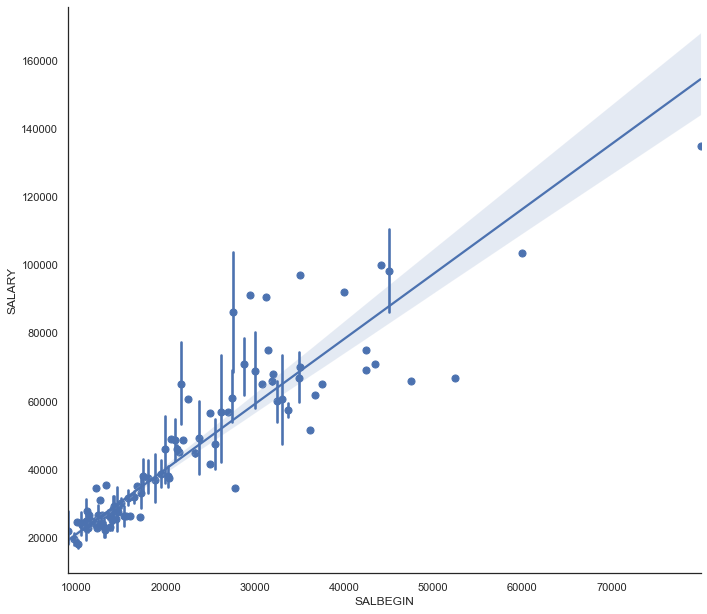

In [170]:
# Plotting the results of our model
sns.lmplot(x="SALBEGIN", y="SALARY", data=salary, x_estimator=np.mean);



fig = plt.gcf()
fig.set_size_inches(11, 9)

This analysis proves strong correlation between the annual salary and the beginner´s salary. The R2 is high and the linear regression also proves the correlation.  

## Hypothesis 2

The correlation between salary and job categories is tested. Below the R squared for each independent variable to salary is calculated and the corresponding data is also plotted. 

In [173]:
# simple linear regression with each explanatory variable
print('R squared for each possible explanatory variable:' )
for explanatory_var in explanatory_vars:
    model = 'SALARY ~ {:}'.format(explanatory_var)
    rs = smf.ols(formula=model, data=salary).fit().rsquared
    print('{:7s} \t \t= {:.3}'.format(explanatory_var, rs))

R squared for each possible explanatory variable:
SALARY  	 	= 1.0
EDUC    	 	= 0.436
SALBEGIN 	 	= 0.775
GENDER  	 	= 0.202
MINORITY 	 	= 0.0314
JOBCAT  	 	= 0.609


It can be observed here that both Gender and Minority have very small R2 values signifying that the correlation between them and annual salary is weak. The plot below also confirms no correlation between them, But job categories has a high R2.

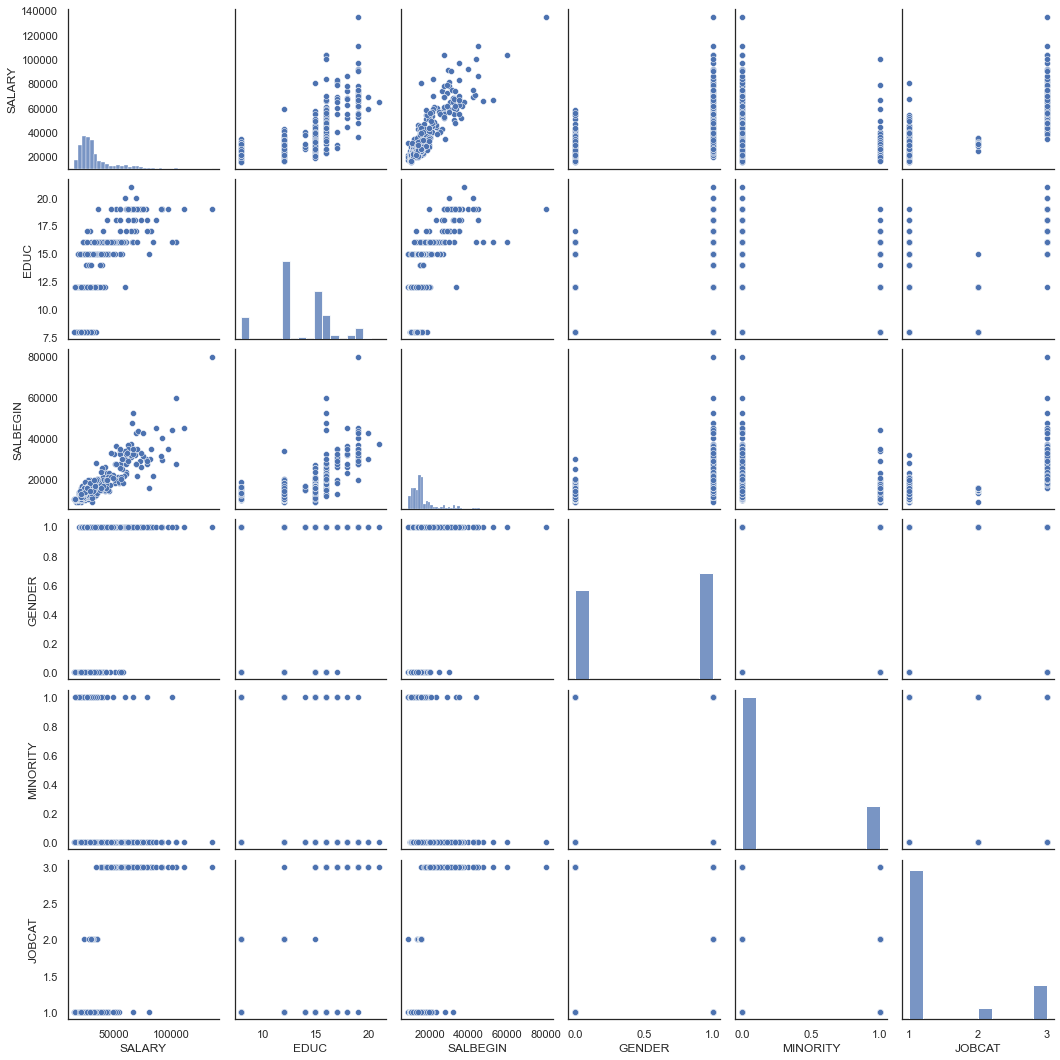

In [148]:
# geting a feeling of the data
sns.pairplot(salary);

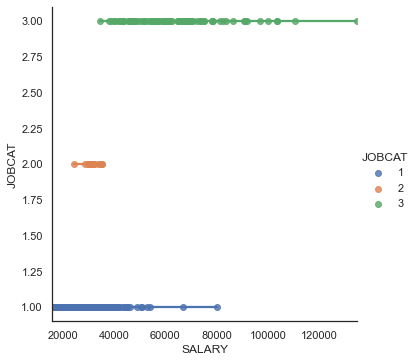

In [198]:
sns.lmplot(x="SALARY", y="JOBCAT", hue = "JOBCAT", data=salary);
#sns.lmplot(x="SALARY", y="MINORITY", hue="MINORITY", data=salary);

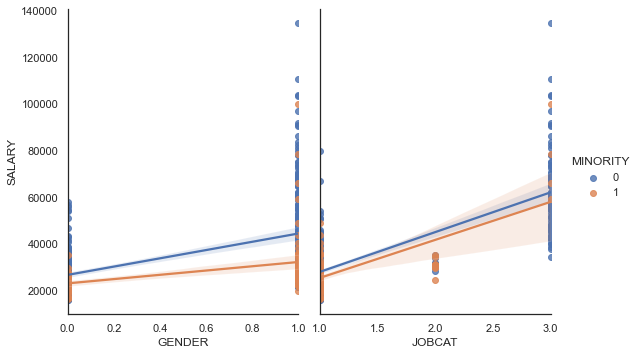

In [184]:
sns.pairplot(salary, x_vars=["GENDER", "JOBCAT"], y_vars=["SALARY"],
             hue="MINORITY", height=5, aspect=.8, kind="reg");

<AxesSubplot:>

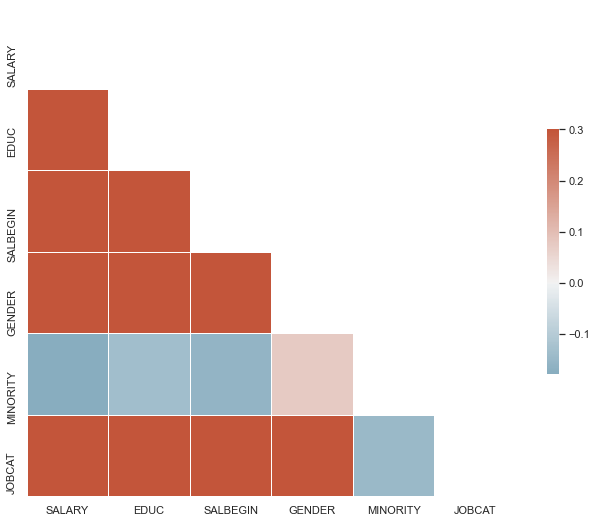

In [78]:

sns.set_theme(style="white")

# Compute the correlation matrix
corr = salary.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [50]:
# use all explanatory variables
model = 'SALARY ~ EDUC + SALBEGIN + GENDER + MINORITY + JOBCAT'
smf.ols(formula=model, data=salary).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 SALARY   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     434.4
Date:                Mon, 31 May 2021   Prob (F-statistic):          3.07e-173
Time:                        14:18:50   Log-Likelihood:                -4881.4
No. Observations:                 474   AIC:                             9775.
Df Residuals:                     468   BIC:                             9800.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6963.9156   1672.249     -4.164      0.000   -1.02e+04   -3677.870
EDUC         890.6082    150.119      5.933      0.000     595.618    1185.598
SALBEGIN       1.2359      0.074     16.793      0.000       1.091       1.380
GENDER      1504.7854    765.637      1.965      0.050       0.274    3009.297
MINORITY   -1432.6138    826.409     -1.734      0.084   -3056.545     191.317
JOBCAT      5550.3397    658.226      8.432      0.000    4256.896    6843.783
==============================================================================
Omnibus:                      199.215   Durbin-Watson:                   1.755
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1620.680
Skew:                           1.610   Prob(JB):                         0.00
Kurtosis:                      11.467   Cond. No.                     9.56e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.56e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [123]:
#salary[['EDUC', 'GENDER', 'MINORITY','JOBCAT']].plot(kind='box', figsize = (20,25))

In [195]:
plt.figure(figsize = (10, 6))
ax = sns.boxplot(y='SALARY','SALBEGIN', data=salary)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

SyntaxError: positional argument follows keyword argument (<ipython-input-195-82f63871bb9f>, line 2)

plt.figure(figsize = (10, 6))
ax = sns.boxplot(x='SALARY', y='SALBEGIN', data=salary)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

<AxesSubplot:>

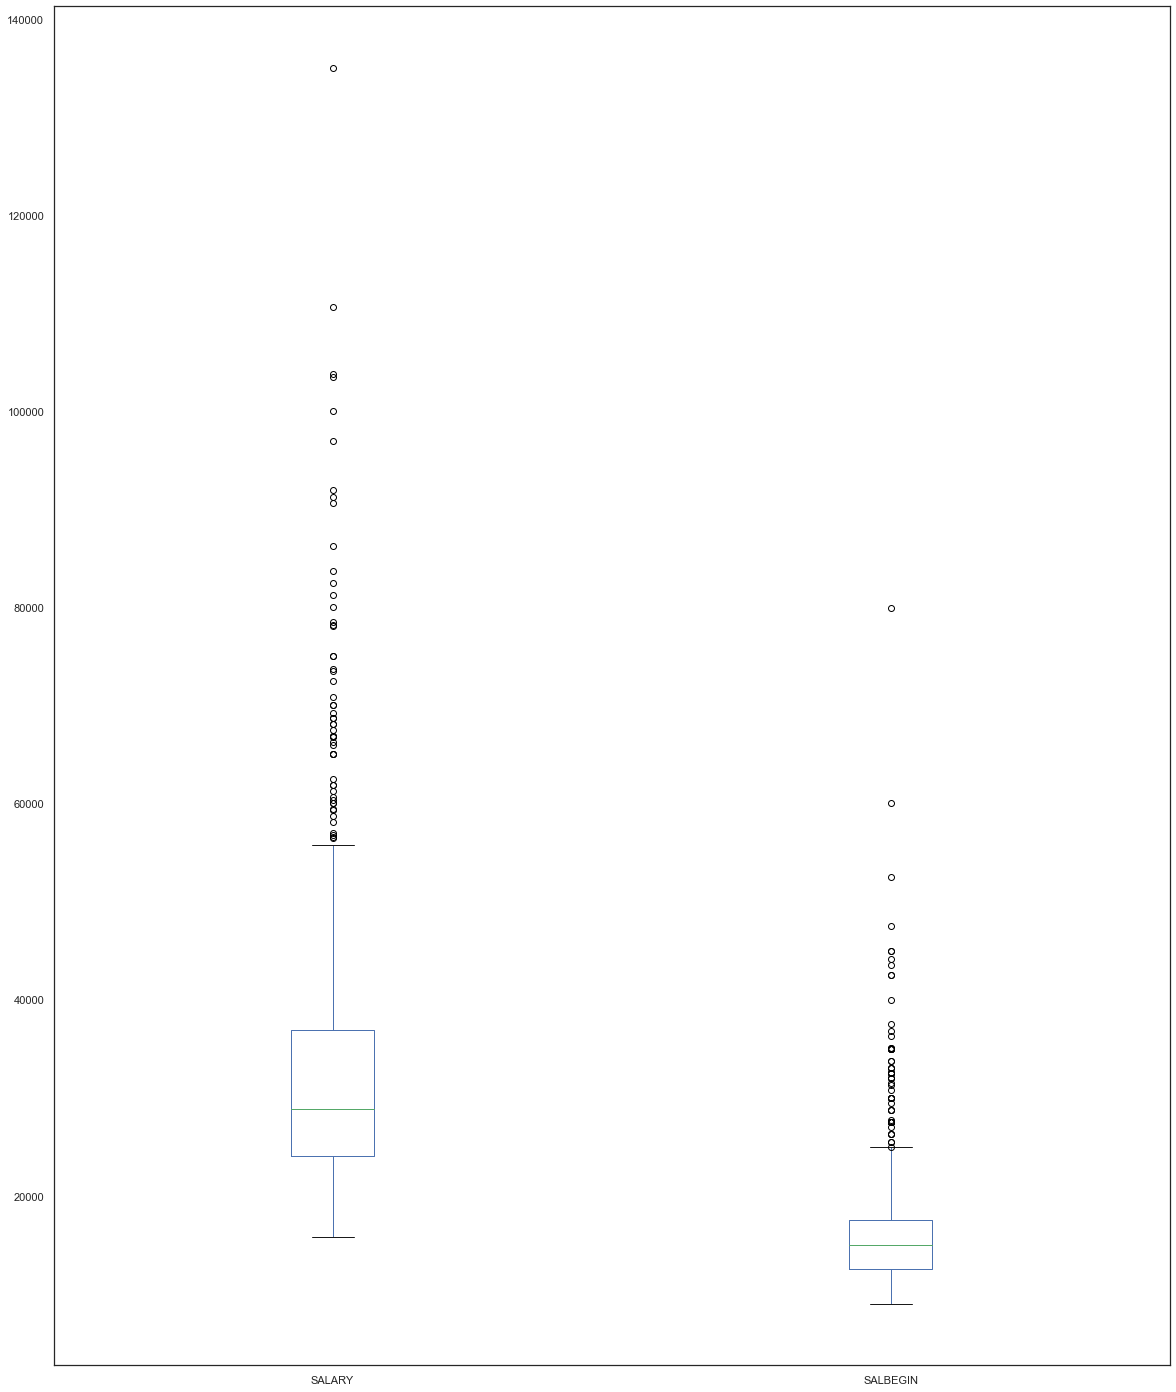

In [196]:
salary[['SALARY', 'SALBEGIN']].plot(kind='box', figsize = (20,25))

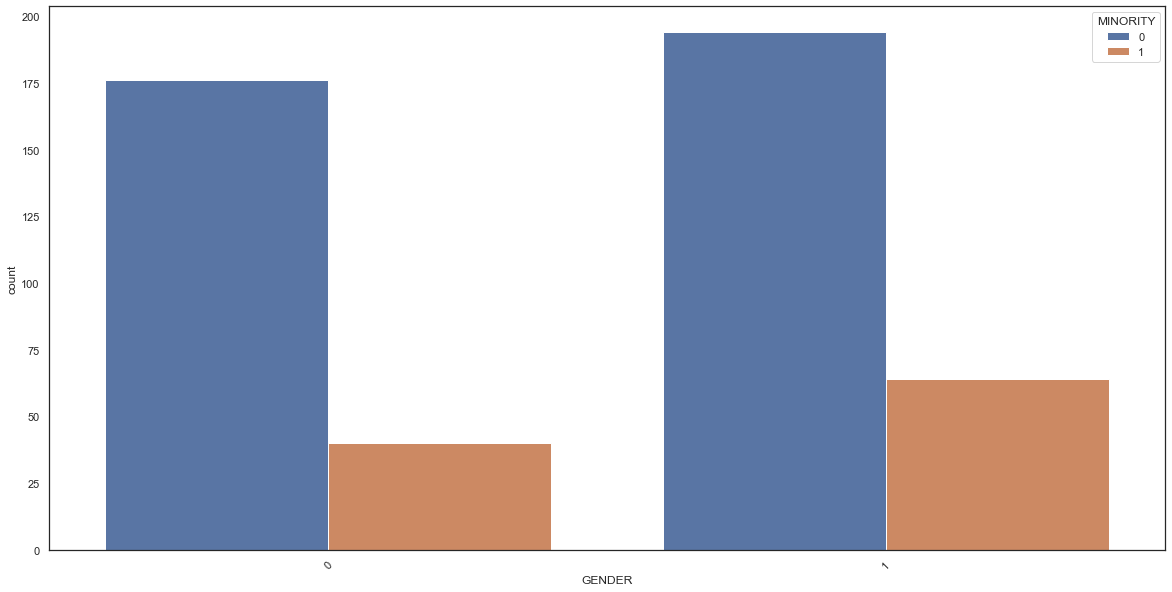

In [116]:
#salary['GENDER'].value_counts().plot(kind='bar',figsize = (20,25))

fig, ax = plt.subplots(figsize = (20,10))    
chart = sns.countplot(x = 'GENDER', hue = 'MINORITY', data = salary) #estimator = median
chart.set_xticklabels(chart.get_xticklabels(),rotation = 45);

In [86]:
salary.head(10)

,SALARY,EDUC,SALBEGIN,GENDER,MINORITY,JOBCAT
0,57000,15,27000,1,0,3
1,40200,16,18750,1,0,1
2,21450,12,12000,0,0,1
3,21900,8,13200,0,0,1
4,45000,15,21000,1,0,1
5,32100,15,13500,1,0,1
6,36000,15,18750,1,0,1
7,21900,12,9750,0,0,1
8,27900,15,12750,0,0,1
9,24000,12,13500,0,0,1
